In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import cv2

In [2]:
%matplotlib inline

In [3]:
original_image = cv2.imread("original.jpg", cv2.IMREAD_GRAYSCALE)
preprocessed_image = cv2.imread("preproc.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
original_image = original_image[0:-78, 0:original_image.shape[1]]


In [15]:
img = cv2.medianBlur(preprocessed_image,5)
ret,thresh = cv2.threshold(preprocessed_image,20,100, cv2.THRESH_BINARY)

In [16]:
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 5500:
        cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
close = 255 - cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)


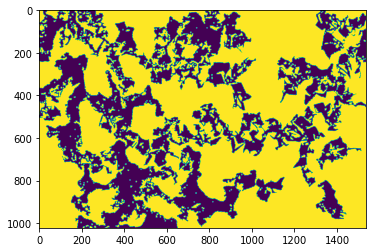

In [18]:
plt.imshow(close)

In [19]:
total_area = 0
cnts = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    total_area += cv2.contourArea(c)
total_area

1568770.0

In [20]:
image_area = img.shape[0] * img.shape[1]

In [21]:
ratio = total_area / image_area * 100
ratio

99.83720776311502

In [22]:
fig = matplotlib.pyplot.figure(figsize=(14.0, 19.0))

<Figure size 1008x1368 with 0 Axes>

In [23]:
ax = fig.add_subplot()
ax.imshow(original_image, cmap='gray')
ax.imshow(close, alpha=0.3)

In [24]:
fig.savefig('segmented.jpg')